# **WEB SCRAPING ON BOOK STORE http://books.toscrape.com/**

In [45]:
import requests
import bs4
import pandas as pd

what we need: 
* pages 
* prices 
* ratings 
* title
* urls (images)

In [1]:
#creating empty lists
pages=[]
prices=[]
ratings=[]
title=[]
urls=[]

In [10]:
no_of_pages = 50 # number of pages to be selected

#looping through the required pages and selecting the pages accordingly 
for i in range(1,no_of_pages,+1): # to include the last page 
    url=('http://books.toscrape.com/catalogue/page-{}.html'.format(i))

In [11]:
pages.append(url) # adding all the content of the respective pages to our created page list

In [12]:
print('number of pages', len(pages))
print(pages)

number of pages 3
['http://books.toscrape.com/catalogue/page-49.html', 'http://books.toscrape.com/catalogue/page-49.html', 'http://books.toscrape.com/catalogue/page-49.html']


#** Getting the data from the particular page url and converting from 
object type 'request to object type beautiful soup, making it more readable **

In [16]:
for item in pages: 
    page=requests.get(item)
    soup=bs4.BeautifulSoup(page.text,'html.parser')

In [17]:
print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:33" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [18]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:33" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

Finding all the Titles

In [20]:
#print all the titles 
for t in soup.findAll('h3'):
    print(t)

<h3><a href="on-the-road-duluoz-legend_40/index.html" title="On the Road (Duluoz Legend)">On the Road (Duluoz ...</a></h3>
<h3><a href="old-records-never-die-one-mans-quest-for-his-vinyl-and-his-past_39/index.html" title="Old Records Never Die: One Man's Quest for His Vinyl and His Past">Old Records Never Die: ...</a></h3>
<h3><a href="off-sides-off-1_38/index.html" title="Off Sides (Off #1)">Off Sides (Off #1)</a></h3>
<h3><a href="of-mice-and-men_37/index.html" title="Of Mice and Men">Of Mice and Men</a></h3>
<h3><a href="myriad-prentor-1_36/index.html" title="Myriad (Prentor #1)">Myriad (Prentor #1)</a></h3>
<h3><a href="my-perfect-mistake-over-the-top-1_35/index.html" title="My Perfect Mistake (Over the Top #1)">My Perfect Mistake (Over ...</a></h3>
<h3><a href="ms-marvel-vol-1-no-normal-ms-marvel-2014-2015-1_34/index.html" title="Ms. Marvel, Vol. 1: No Normal (Ms. Marvel (2014-2015) #1)">Ms. Marvel, Vol. 1: ...</a></h3>
<h3><a href="meditations_33/index.html" title="Meditations">M

In [21]:
#find all the title and add to our empty title list 
for t in soup.findAll('h3'):
    titless= t.getText()
    title.append(titless)

In [22]:
titless

'Fruits Basket, Vol. 1 ...'

In [23]:
title

['On the Road (Duluoz ...',
 'Old Records Never Die: ...',
 'Off Sides (Off #1)',
 'Of Mice and Men',
 'Myriad (Prentor #1)',
 'My Perfect Mistake (Over ...',
 'Ms. Marvel, Vol. 1: ...',
 'Meditations',
 'Matilda',
 'Lost Among the Living',
 'Lord of the Flies',
 'Listen to Me (Fusion ...',
 'Kitchens of the Great ...',
 'Jane Eyre',
 'Imperfect Harmony',
 'Icing (Aces Hockey #2)',
 'Hawkeye, Vol. 1: My ...',
 "Having the Barbarian's Baby ...",
 'Giant Days, Vol. 1 ...',
 'Fruits Basket, Vol. 1 ...']

In [24]:
#find all the prices 
for p in soup.findAll('p',class_='price_color'): #the 'p' tag is in the 'price color' class. NB. Make sure to add underscore to class (class_) in order to differentiate it from python inbuilt class
    price=p.getText()
    prices.append(price)

In [25]:
#our price list now contains all of the prices of the book 
print(prices)

['Â£32.36', 'Â£55.66', 'Â£39.45', 'Â£47.11', 'Â£58.75', 'Â£38.92', 'Â£39.39', 'Â£25.89', 'Â£28.34', 'Â£27.70', 'Â£24.89', 'Â£58.99', 'Â£57.20', 'Â£38.43', 'Â£34.74', 'Â£40.44', 'Â£45.24', 'Â£34.96', 'Â£56.76', 'Â£40.28']


In [30]:
#getting all the ratings 
for s in soup.find_all('p',class_='star-rating'):
    for k,v in s.attrs.items():
        star=v[1]
        ratings.append(star)
        print(star)

Three
Two
Five
Two
Four
Two
Four
Two
One
Four
Three
Three
Five
Five
Four
Four
Three
Four
Four
Five


In [31]:
v

['star-rating', 'Five']

Finding all the URLS of the image

In [32]:
divs = soup.find_all('div',class_='image_container') # fetching all the div tags in the class called image_container
for thumbs in divs:
    taggs = thumbs.find('img',class_='thumbnail')
    links = 'http://books.toscrape.com/' +str(taggs['src'])
    newlinks = links.replace('..','')
    urls.append(newlinks)

In [33]:
divs

[<div class="image_container">
 <a href="on-the-road-duluoz-legend_40/index.html"><img alt="On the Road (Duluoz Legend)" class="thumbnail" src="../media/cache/b8/3e/b83e5f1b9c1dcfe0ef05cff4b080e0fa.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="old-records-never-die-one-mans-quest-for-his-vinyl-and-his-past_39/index.html"><img alt="Old Records Never Die: One Man's Quest for His Vinyl and His Past" class="thumbnail" src="../media/cache/7e/94/7e947f3dd04f178175b85123829467a9.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="off-sides-off-1_38/index.html"><img alt="Off Sides (Off #1)" class="thumbnail" src="../media/cache/03/ed/03ed67ea504353b91b035151d8e80db2.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="of-mice-and-men_37/index.html"><img alt="Of Mice and Men" class="thumbnail" src="../media/cache/0f/ca/0fca4597765ffacdb7bd529fc5eb88fa.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="myriad-prentor-1_36/index.html"><img alt="Myriad (Pr

In [37]:
taggs['src']

'../media/cache/7c/c1/7cc13a8fb238202250e87843c1a62f94.jpg'

In [38]:
links

'http://books.toscrape.com/../media/cache/7c/c1/7cc13a8fb238202250e87843c1a62f94.jpg'

In [39]:
newlinks

'http://books.toscrape.com//media/cache/7c/c1/7cc13a8fb238202250e87843c1a62f94.jpg'

In [40]:
urls

['http://books.toscrape.com//media/cache/b8/3e/b83e5f1b9c1dcfe0ef05cff4b080e0fa.jpg',
 'http://books.toscrape.com//media/cache/7e/94/7e947f3dd04f178175b85123829467a9.jpg',
 'http://books.toscrape.com//media/cache/03/ed/03ed67ea504353b91b035151d8e80db2.jpg',
 'http://books.toscrape.com//media/cache/0f/ca/0fca4597765ffacdb7bd529fc5eb88fa.jpg',
 'http://books.toscrape.com//media/cache/6b/fa/6bfae8a489ff53f50467705c1e6fff19.jpg',
 'http://books.toscrape.com//media/cache/0d/03/0d03eb55ed070a53b6c4b6eedd48b458.jpg',
 'http://books.toscrape.com//media/cache/f4/96/f496db4d78639e233978ae2bee021752.jpg',
 'http://books.toscrape.com//media/cache/df/c9/dfc9ed72e963572d23233b3a8cb01676.jpg',
 'http://books.toscrape.com//media/cache/03/47/0347bd215f4813edd81c2cd76bab53ca.jpg',
 'http://books.toscrape.com//media/cache/5a/40/5a40d914bc3491e5909f1167f9cb34f2.jpg',
 'http://books.toscrape.com//media/cache/33/73/3373a168b588e3fb19c558a21da71ac9.jpg',
 'http://books.toscrape.com//media/cache/00/dd/00dd43f

In [41]:
for url in urls:
    print(url)

http://books.toscrape.com//media/cache/b8/3e/b83e5f1b9c1dcfe0ef05cff4b080e0fa.jpg
http://books.toscrape.com//media/cache/7e/94/7e947f3dd04f178175b85123829467a9.jpg
http://books.toscrape.com//media/cache/03/ed/03ed67ea504353b91b035151d8e80db2.jpg
http://books.toscrape.com//media/cache/0f/ca/0fca4597765ffacdb7bd529fc5eb88fa.jpg
http://books.toscrape.com//media/cache/6b/fa/6bfae8a489ff53f50467705c1e6fff19.jpg
http://books.toscrape.com//media/cache/0d/03/0d03eb55ed070a53b6c4b6eedd48b458.jpg
http://books.toscrape.com//media/cache/f4/96/f496db4d78639e233978ae2bee021752.jpg
http://books.toscrape.com//media/cache/df/c9/dfc9ed72e963572d23233b3a8cb01676.jpg
http://books.toscrape.com//media/cache/03/47/0347bd215f4813edd81c2cd76bab53ca.jpg
http://books.toscrape.com//media/cache/5a/40/5a40d914bc3491e5909f1167f9cb34f2.jpg
http://books.toscrape.com//media/cache/33/73/3373a168b588e3fb19c558a21da71ac9.jpg
http://books.toscrape.com//media/cache/00/dd/00dd43f59d255cbc16e9d9c9ed20a997.jpg
http://books.tos

#Data processing on scrapped data

we will create a pandas dataframe which will contain all the data we have scraped. 
First lets create a dictionary for all data

In [42]:
web_data = {'Title':title,'Price':prices,'Ratings':ratings,'URL':urls}

In [43]:
print(len(title))
print(len(prices))
print(len(ratings))
print(len(urls))

20
20
20
20


In [44]:
web_data

{'Title': ['On the Road (Duluoz ...',
  'Old Records Never Die: ...',
  'Off Sides (Off #1)',
  'Of Mice and Men',
  'Myriad (Prentor #1)',
  'My Perfect Mistake (Over ...',
  'Ms. Marvel, Vol. 1: ...',
  'Meditations',
  'Matilda',
  'Lost Among the Living',
  'Lord of the Flies',
  'Listen to Me (Fusion ...',
  'Kitchens of the Great ...',
  'Jane Eyre',
  'Imperfect Harmony',
  'Icing (Aces Hockey #2)',
  'Hawkeye, Vol. 1: My ...',
  "Having the Barbarian's Baby ...",
  'Giant Days, Vol. 1 ...',
  'Fruits Basket, Vol. 1 ...'],
 'Price': ['Â£32.36',
  'Â£55.66',
  'Â£39.45',
  'Â£47.11',
  'Â£58.75',
  'Â£38.92',
  'Â£39.39',
  'Â£25.89',
  'Â£28.34',
  'Â£27.70',
  'Â£24.89',
  'Â£58.99',
  'Â£57.20',
  'Â£38.43',
  'Â£34.74',
  'Â£40.44',
  'Â£45.24',
  'Â£34.96',
  'Â£56.76',
  'Â£40.28'],
 'Ratings': ['Three',
  'Two',
  'Five',
  'Two',
  'Four',
  'Two',
  'Four',
  'Two',
  'One',
  'Four',
  'Three',
  'Three',
  'Five',
  'Five',
  'Four',
  'Four',
  'Three',
  'Four',
  'F

Convert our dictionary to a DataFrame

In [48]:
df = pd.DataFrame(web_data)

In [49]:
df

,Title,Price,Ratings,URL
0,On the Road (Duluoz ...,Â£32.36,Three,http://books.toscrape.com//media/cache/b8/3e/b...
1,Old Records Never Die: ...,Â£55.66,Two,http://books.toscrape.com//media/cache/7e/94/7...
2,Off Sides (Off #1),Â£39.45,Five,http://books.toscrape.com//media/cache/03/ed/0...
3,Of Mice and Men,Â£47.11,Two,http://books.toscrape.com//media/cache/0f/ca/0...
4,Myriad (Prentor #1),Â£58.75,Four,http://books.toscrape.com//media/cache/6b/fa/6...
5,My Perfect Mistake (Over ...,Â£38.92,Two,http://books.toscrape.com//media/cache/0d/03/0...
6,"Ms. Marvel, Vol. 1: ...",Â£39.39,Four,http://books.toscrape.com//media/cache/f4/96/f...
7,Meditations,Â£25.89,Two,http://books.toscrape.com//media/cache/df/c9/d...
8,Matilda,Â£28.34,One,http://books.toscrape.com//media/cache/03/47/0...
9,Lost Among the Living,Â£27.70,Four,http://books.toscrape.com//media/cache/5a/40/5...


In [50]:
df.index+=1

In [51]:
df

,Title,Price,Ratings,URL
1,On the Road (Duluoz ...,Â£32.36,Three,http://books.toscrape.com//media/cache/b8/3e/b...
2,Old Records Never Die: ...,Â£55.66,Two,http://books.toscrape.com//media/cache/7e/94/7...
3,Off Sides (Off #1),Â£39.45,Five,http://books.toscrape.com//media/cache/03/ed/0...
4,Of Mice and Men,Â£47.11,Two,http://books.toscrape.com//media/cache/0f/ca/0...
5,Myriad (Prentor #1),Â£58.75,Four,http://books.toscrape.com//media/cache/6b/fa/6...
6,My Perfect Mistake (Over ...,Â£38.92,Two,http://books.toscrape.com//media/cache/0d/03/0...
7,"Ms. Marvel, Vol. 1: ...",Â£39.39,Four,http://books.toscrape.com//media/cache/f4/96/f...
8,Meditations,Â£25.89,Two,http://books.toscrape.com//media/cache/df/c9/d...
9,Matilda,Â£28.34,One,http://books.toscrape.com//media/cache/03/47/0...
10,Lost Among the Living,Â£27.70,Four,http://books.toscrape.com//media/cache/5a/40/5...


In [56]:
df['Price']=df['Price'].str.replace('Â£','')

In [57]:
df

,Title,Price,Ratings,URL
1,On the Road (Duluoz ...,32.36,Three,http://books.toscrape.com//media/cache/b8/3e/b...
2,Old Records Never Die: ...,55.66,Two,http://books.toscrape.com//media/cache/7e/94/7...
3,Off Sides (Off #1),39.45,Five,http://books.toscrape.com//media/cache/03/ed/0...
4,Of Mice and Men,47.11,Two,http://books.toscrape.com//media/cache/0f/ca/0...
5,Myriad (Prentor #1),58.75,Four,http://books.toscrape.com//media/cache/6b/fa/6...
6,My Perfect Mistake (Over ...,38.92,Two,http://books.toscrape.com//media/cache/0d/03/0...
7,"Ms. Marvel, Vol. 1: ...",39.39,Four,http://books.toscrape.com//media/cache/f4/96/f...
8,Meditations,25.89,Two,http://books.toscrape.com//media/cache/df/c9/d...
9,Matilda,28.34,One,http://books.toscrape.com//media/cache/03/47/0...
10,Lost Among the Living,27.70,Four,http://books.toscrape.com//media/cache/5a/40/5...


we can now sort our price column to see the highest price

In [58]:
df.sort_values(by='Price',ascending = False,inplace=True)

convert the ratings column to an integer instead of a string

In [59]:
df['Ratings']=df['Ratings'].replace({'Three':3,'One':1,'Two':2,'Four':4,'Five':5})

In [60]:
df

,Title,Price,Ratings,URL
12,Listen to Me (Fusion ...,58.99,3,http://books.toscrape.com//media/cache/00/dd/0...
5,Myriad (Prentor #1),58.75,4,http://books.toscrape.com//media/cache/6b/fa/6...
13,Kitchens of the Great ...,57.20,5,http://books.toscrape.com//media/cache/5e/37/5...
19,"Giant Days, Vol. 1 ...",56.76,4,http://books.toscrape.com//media/cache/35/0b/3...
2,Old Records Never Die: ...,55.66,2,http://books.toscrape.com//media/cache/7e/94/7...
4,Of Mice and Men,47.11,2,http://books.toscrape.com//media/cache/0f/ca/0...
17,"Hawkeye, Vol. 1: My ...",45.24,3,http://books.toscrape.com//media/cache/16/46/1...
16,Icing (Aces Hockey #2),40.44,4,http://books.toscrape.com//media/cache/8d/1e/8...
20,"Fruits Basket, Vol. 1 ...",40.28,5,http://books.toscrape.com//media/cache/7c/c1/7...
3,Off Sides (Off #1),39.45,5,http://books.toscrape.com//media/cache/03/ed/0...


In [62]:
#check the datatypes
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

convert the price column from object to float

In [63]:
df['Price']=df['Price'].astype(float)

In [64]:
df.dtypes

Title       object
Price      float64
Ratings      int64
URL         object
dtype: object

is there any correlation between the ratings of the product and the price?

In [65]:
df.corr()

C:\Users\eapau\AppData\Local\Temp\ipykernel_2312\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Ratings
Price,1.000000,0.187253
Ratings,0.187253,1.000000


let's visualize it

C:\Users\eapau\AppData\Local\Temp\ipykernel_2312\2114367006.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

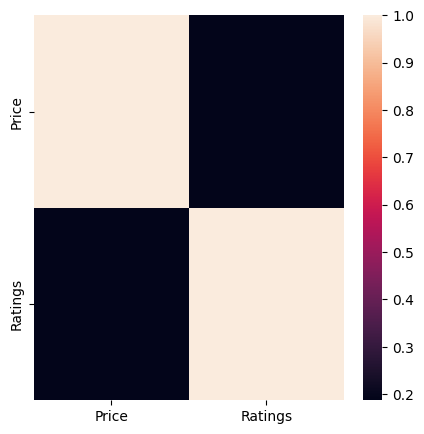

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(df.corr())